In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

#### PART 1


We can generate p-ER random graphs and r-regular random graphs with the following networkx functions. Where p is the probability that given 2 different nodes there exists an edge between them, and r is the number of neighbours that each graph has.

In [19]:
ERgraph = nx.erdos_renyi_graph(n=100,p=0.05) # n is the number of nodes, p the probability
regular_graph = nx.random_regular_graph(d=8,n=100) # d is the number of neighbours, n is the number of nodes

#### PART 2

To verify the connectivity of a graph we have 3 options: \
$\bf{BFS}$: starting from a generic node we explore the graph, and if the final visited nodes are equal to the total nodes it means 
     that the graph is connected
$\bf{Adjacency \ matrix} $: To check if the graph is connected we need to check if the adjacency matrix $ A $ is irreducible, i.e. if:  $\bf{I} + A^1 + A^2 + ... + A^{n-1}>0$, where $n$ is the number of nodes (also number of rows and columns, $A$ is $nxn$). The > 0 means that all terms of the final matrix given by the sum of all those exponential matrix are greater than 0. To do this we have to evaluate the exponential of a matrix. This can be compute by repeating the multiplication $n$ times and then summing all the terms, but it is not very effiecient i think. I am thinking alternative ways, like diagonalizing the matrix (changing coordinates). \
$\bf{Laplacian \ eigenvalues}$: The connectivity can also be verified studying the multiplicity of the second smallest eigenvalue of the Laplacian Matrix, that is the matrix defined in the following way: $L = D - A$, where $A$ is the adjacency matrix, and $D$ is the diagonal matrix where the entries are all the degrees of the nodes. The eigenvalues can be computed with $\texttt{numpy}$ functions, like $\texttt{numpy.linalg.eig}$ ,and what we have to do is to find the second smallest eigenvalue (the smallest is always 0), and check how many times it occurs. For example, if the eigenvalues of a matrix are 0,2,2,3,4 the second smallest is 2 and it occurs 2 times, it means that the graph is formed by 2 connected parts. So a graph is connected if and only if the second smallest eigenvalue occurs only one time.

#### PART 3 

The complexities as function of the number of nodes are known for the BFS algorithm, and for the diagonalization (should be $=O(N^3)$), for the adjacency matrix part we still have to choose one method.

#### PART 4

Since a random graph can be connect or not, we run a monte carlo simulation to check its connectivity. Here an example of the case for the $p-ER$ random graph:

In [ ]:
# list to save the p values, probability that there exists an edge between 2 nodes
p_values = []
# list to save the compute probabilities by MC simulation
prob_connected = []
# starting value
p = 0
# j in this case doesn't enter in the loop, it is just needed to run the cycle 100 times and to increase each time p by 0.001
for j in range(100):
    p_values.append(p)
    is_connected_counter = 0
    # in this second for loop, having fixed p, we generate the graph 1000 times, since the process is random the outcome 
    # will be different every time. With the function nx.is_connected() we check the connectivity and if it is connected
    # then we increase by 1 the counter. At the end we append the fraction of times the graph was connectd and the total
    #times we generated the graph
    for i in range(1000):
        ERgraph = nx.erdos_renyi_graph(100,p)
        if nx.is_connected(ERgraph):
            is_connected_counter += 1
    # finished the previous loop we increase the value of p and append the fraction. 
    p += 0.001
    prob_connected.append(is_connected_counter/1000)

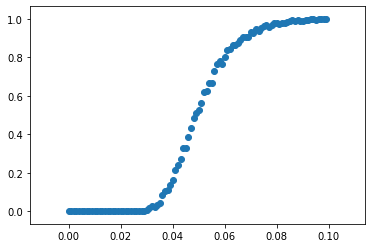

In [52]:
# here is the probability
plt.scatter(p_values,prob_connected)

In [17]:
# same thing here for the r-regula graph
K_values = []
prob_connected = []
for K in range(3,101):
    #print(K)
    K_values.append(K)
    is_connected_counter = 0
    for i in range(1000):
        regular_graph = nx.random_regular_graph(d=2,n=K)
        if nx.is_connected(regular_graph):
            is_connected_counter += 1
    prob_connected.append(is_connected_counter/1000)

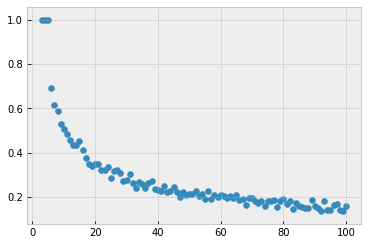

In [18]:
plt.scatter(K_values, prob_connected)